Before you turn this problem set in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). Note that in code sections, you must replace `stop("Not Implemented")` with your code. Otherwise, you will have points automatically deducted in the grading process.

**Please do not rename this file.**

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER/EXPLANATION HERE". In addition, please do not include your name on this assignment to ensure anonymity for the peer reviews.

---

# Problem 1

Take a look at the `SleepStudy` data within the `Lock5Data` package. The goal in this exercise will be to create a model to predict student GPAs. As an exploratory data analysis tool create a pairwise scatterplot (page 23 of lecture 9) to see whether there are any patterns visible between the following variables: 

- GPA 
- Gender 
- ClassYear 
- CognitionZscore 
- DepressionScore 
- AnxietyScore 
- StressScore 
- Drinks 
- WeekdaySleep 
- WeekendRise

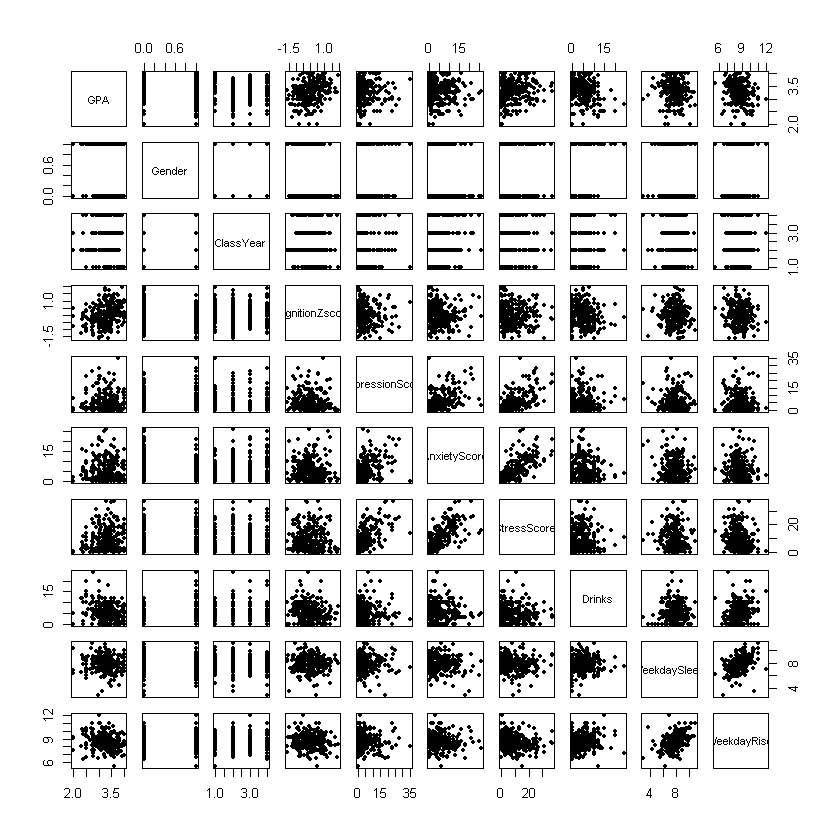

In [1]:
library(Lock5Data)
data("SleepStudy")
attach(SleepStudy)
pairs(~ GPA + Gender + ClassYear + CognitionZscore + DepressionScore + AnxietyScore + StressScore + Drinks + WeekdaySleep + WeekdayRise, pch = 20)


Next, create a plot to compare the effects of treating the `ClassYear` variable as a continuous or a categorical predictor of `GPA`. Hint: You will need to complete at least one very basic linear model to create the lines necessary in the plot. Be sure to include a title, clear labels, and context information!

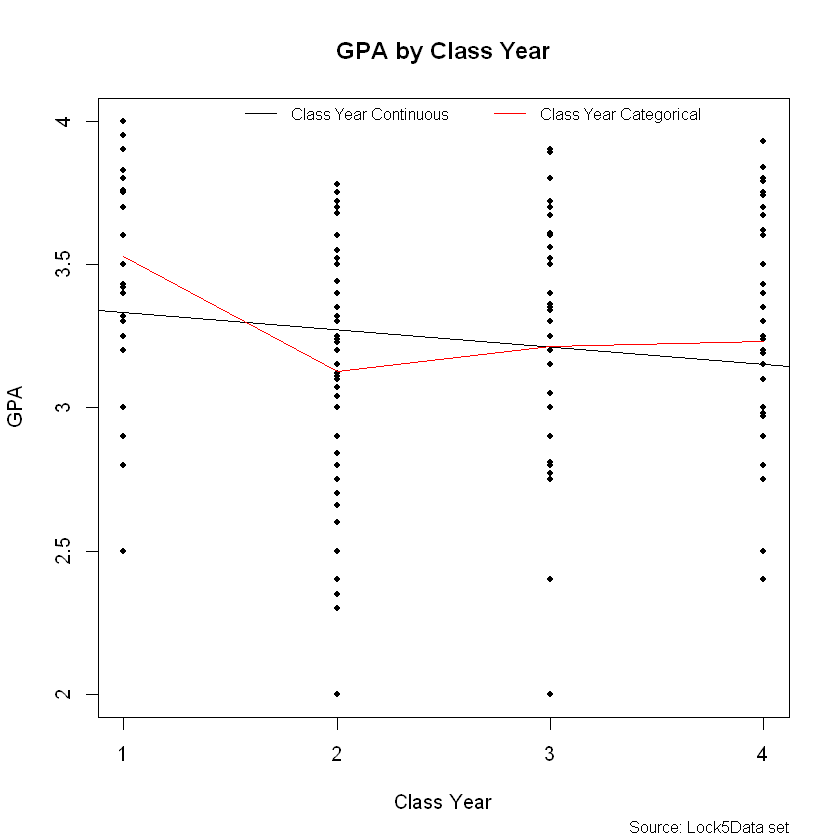

In [2]:

plot(ClassYear, GPA, pch = 20, xlab = "", ylab = "", axes = F)
axis(1, at = c(1,2,3,4), labels = c(1,2,3,4))
axis(2, at = seq(2.0, 4.0, by = .5), labels = seq(2.0, 4.0, by = .5))
ContYear <- lm(GPA ~ ClassYear)
CatYear <- lm(GPA ~ factor(ClassYear))
abline(ContYear)
r <- CatYear$coefficients[1]+CatYear$coefficients[2:4]
CatYearPoints <- c(CatYear$coefficients[1], r)
lines(c(1,2,3,4), CatYearPoints, col = "red")
title(main = "GPA by Class Year", xlab = "Class Year", ylab= "GPA")
legend(1.5,4.1, lty = c(1,1), col = c("black", "red"), c("Class Year Continuous", "Class Year Categorical"), cex = .8, horiz = T, bty = "n" )
box()
mtext("Source: Lock5Data set", side = 1, line = 4, adj = 1, cex = .8)

Following the steps used in the lecture, fit a model to predict a student's GPA. Include any intermediate steps in R that you take, explained with short comments in your code. Exploring interaction terms is encouraged, but not required.

In [3]:
mod <- lm(GPA ~ Gender + ClassYear + CognitionZscore + DepressionScore + AnxietyScore + StressScore + Drinks + WeekdaySleep + WeekdayRise)
summary(mod)
#Seemingly Gender doesn't affect GPA, so checking to be sure even if used as a factor

Gendermod1 <- lm(GPA ~ Gender)
Gendermod2 <- lm(GPA ~ factor(Gender))
summary(Gendermod1)
summary(Gendermod2)
#Making new model without gender as a predictor

mod2 <- lm(GPA ~ ClassYear + CognitionZscore + DepressionScore + AnxietyScore + StressScore + Drinks + WeekdaySleep + WeekdayRise)
summary(mod2)
#Checking weekday sleep variable, finding no correlation

WeekdaySleepmod <- lm(GPA ~ WeekdaySleep)
summary(WeekdaySleepmod)
#New model without weekday sleep variable

mod3 <- lm(GPA ~ ClassYear + CognitionZscore + DepressionScore + AnxietyScore + StressScore + Drinks + WeekdayRise)
summary(mod3)

#Droping Weekday Rise

mod4 <- lm(GPA ~ ClassYear + CognitionZscore + DepressionScore + AnxietyScore + StressScore + Drinks)
summary(mod4)

#Dropping DepressionScore
mod5 <- lm(GPA ~ ClassYear + CognitionZscore + AnxietyScore + StressScore + Drinks)
summary(mod5)

#Treating Class Year as factor
mod6 <- lm(GPA ~ factor(ClassYear) + CognitionZscore + AnxietyScore + StressScore + Drinks)
summary(mod6)



Call:
lm(formula = GPA ~ Gender + ClassYear + CognitionZscore + DepressionScore + 
    AnxietyScore + StressScore + Drinks + WeekdaySleep + WeekdayRise)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.21472 -0.18645  0.03179  0.23478  0.82439 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      3.863744   0.235814  16.385  < 2e-16 ***
Gender          -0.078908   0.053038  -1.488 0.138107    
ClassYear       -0.073987   0.022056  -3.354 0.000922 ***
CognitionZscore  0.126061   0.032945   3.826 0.000165 ***
DepressionScore -0.009725   0.004932  -1.972 0.049749 *  
AnxietyScore    -0.017434   0.006226  -2.800 0.005519 ** 
StressScore      0.021755   0.004650   4.678 4.81e-06 ***
Drinks          -0.014242   0.006080  -2.343 0.019961 *  
WeekdaySleep    -0.019933   0.021906  -0.910 0.363751    
WeekdayRise     -0.026832   0.027874  -0.963 0.336687    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard err


Call:
lm(formula = GPA ~ Gender)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.32490 -0.27490 -0.02373  0.27510  0.87627 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.32490    0.03196 104.019  < 2e-16 ***
Gender      -0.20118    0.05034  -3.996 8.47e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3928 on 251 degrees of freedom
Multiple R-squared:  0.05982,	Adjusted R-squared:  0.05607 
F-statistic: 15.97 on 1 and 251 DF,  p-value: 8.465e-05



Call:
lm(formula = GPA ~ factor(Gender))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.32490 -0.27490 -0.02373  0.27510  0.87627 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      3.32490    0.03196 104.019  < 2e-16 ***
factor(Gender)1 -0.20118    0.05034  -3.996 8.47e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3928 on 251 degrees of freedom
Multiple R-squared:  0.05982,	Adjusted R-squared:  0.05607 
F-statistic: 15.97 on 1 and 251 DF,  p-value: 8.465e-05



Call:
lm(formula = GPA ~ ClassYear + CognitionZscore + DepressionScore + 
    AnxietyScore + StressScore + Drinks + WeekdaySleep + WeekdayRise)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.22397 -0.18353  0.01815  0.24803  0.81375 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      3.845144   0.236067  16.288  < 2e-16 ***
ClassYear       -0.071480   0.022047  -3.242  0.00135 ** 
CognitionZscore  0.134289   0.032558   4.125 5.10e-05 ***
DepressionScore -0.010897   0.004880  -2.233  0.02646 *  
AnxietyScore    -0.016728   0.006224  -2.688  0.00769 ** 
StressScore      0.022675   0.004620   4.908 1.69e-06 ***
Drinks          -0.017367   0.005720  -3.036  0.00265 ** 
WeekdaySleep    -0.014564   0.021660  -0.672  0.50197    
WeekdayRise     -0.032733   0.027659  -1.183  0.23778    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3578 on 244 degrees of freedom
Multiple R-squared:  0.2418,	A


Call:
lm(formula = GPA ~ WeekdaySleep)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.28428 -0.23733  0.03476  0.25908  0.81182 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.46102    0.17321  19.982   <2e-16 ***
WeekdaySleep -0.02762    0.02178  -1.268    0.206    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4038 on 251 degrees of freedom
Multiple R-squared:  0.006363,	Adjusted R-squared:  0.002404 
F-statistic: 1.607 on 1 and 251 DF,  p-value: 0.206



Call:
lm(formula = GPA ~ ClassYear + CognitionZscore + DepressionScore + 
    AnxietyScore + StressScore + Drinks + WeekdayRise)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.22736 -0.18243  0.01289  0.24390  0.83974 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      3.795750   0.224095  16.938  < 2e-16 ***
ClassYear       -0.071185   0.022017  -3.233  0.00139 ** 
CognitionZscore  0.134017   0.032519   4.121 5.16e-05 ***
DepressionScore -0.010869   0.004875  -2.230  0.02667 *  
AnxietyScore    -0.015932   0.006103  -2.611  0.00960 ** 
StressScore      0.022336   0.004588   4.869 2.01e-06 ***
Drinks          -0.017144   0.005704  -3.006  0.00292 ** 
WeekdayRise     -0.040694   0.024969  -1.630  0.10443    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3574 on 245 degrees of freedom
Multiple R-squared:  0.2404,	Adjusted R-squared:  0.2187 
F-statistic: 11.07 on 7 and 245 DF,  p-value:


Call:
lm(formula = GPA ~ ClassYear + CognitionZscore + DepressionScore + 
    AnxietyScore + StressScore + Drinks)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.24820 -0.18604  0.01701  0.24747  0.80941 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      3.449098   0.070799  48.717  < 2e-16 ***
ClassYear       -0.071393   0.022091  -3.232  0.00140 ** 
CognitionZscore  0.139015   0.032483   4.280 2.68e-05 ***
DepressionScore -0.011395   0.004880  -2.335  0.02035 *  
AnxietyScore    -0.016840   0.006098  -2.762  0.00619 ** 
StressScore      0.023804   0.004513   5.274 2.92e-07 ***
Drinks          -0.018670   0.005645  -3.307  0.00108 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3586 on 246 degrees of freedom
Multiple R-squared:  0.2321,	Adjusted R-squared:  0.2134 
F-statistic: 12.39 on 6 and 246 DF,  p-value: 3.423e-12



Call:
lm(formula = GPA ~ ClassYear + CognitionZscore + AnxietyScore + 
    StressScore + Drinks)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.33306 -0.19651  0.02551  0.25402  0.79491 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      3.431247   0.071017  48.316  < 2e-16 ***
ClassYear       -0.064652   0.022098  -2.926 0.003757 ** 
CognitionZscore  0.140251   0.032770   4.280 2.68e-05 ***
AnxietyScore    -0.018100   0.006129  -2.953 0.003446 ** 
StressScore      0.018917   0.004035   4.689 4.55e-06 ***
Drinks          -0.019584   0.005682  -3.447 0.000667 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3618 on 247 degrees of freedom
Multiple R-squared:  0.2151,	Adjusted R-squared:  0.1992 
F-statistic: 13.54 on 5 and 247 DF,  p-value: 1.115e-11



Call:
lm(formula = GPA ~ factor(ClassYear) + CognitionZscore + AnxietyScore + 
    StressScore + Drinks)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.20261 -0.18396  0.01446  0.24769  0.74472 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         3.512259   0.063744  55.099  < 2e-16 ***
factor(ClassYear)2 -0.332341   0.063373  -5.244 3.39e-07 ***
factor(ClassYear)3 -0.309057   0.069865  -4.424 1.46e-05 ***
factor(ClassYear)4 -0.276783   0.069234  -3.998 8.47e-05 ***
CognitionZscore     0.120996   0.032008   3.780 0.000197 ***
AnxietyScore       -0.017694   0.005907  -2.995 0.003022 ** 
StressScore         0.018450   0.003891   4.742 3.59e-06 ***
Drinks             -0.017050   0.005502  -3.099 0.002169 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3485 on 245 degrees of freedom
Multiple R-squared:  0.2777,	Adjusted R-squared:  0.257 
F-statistic: 13.45 on 7 and 245 DF,  p-valu

Make a plot of the four residual analysis plots to make sure the regression does not violate any assumptions in a major way.

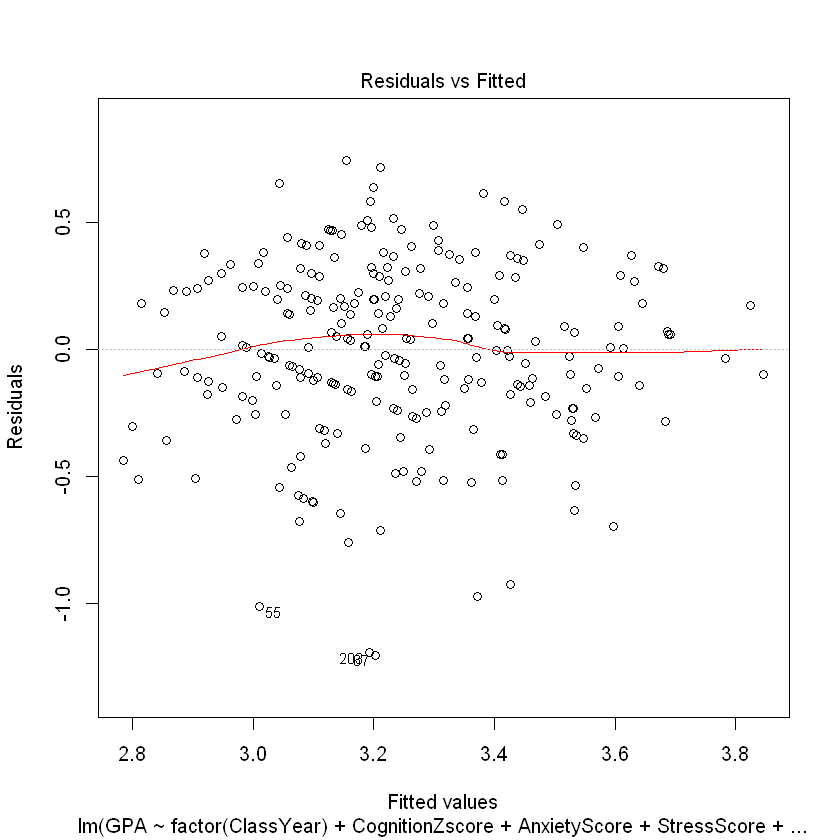

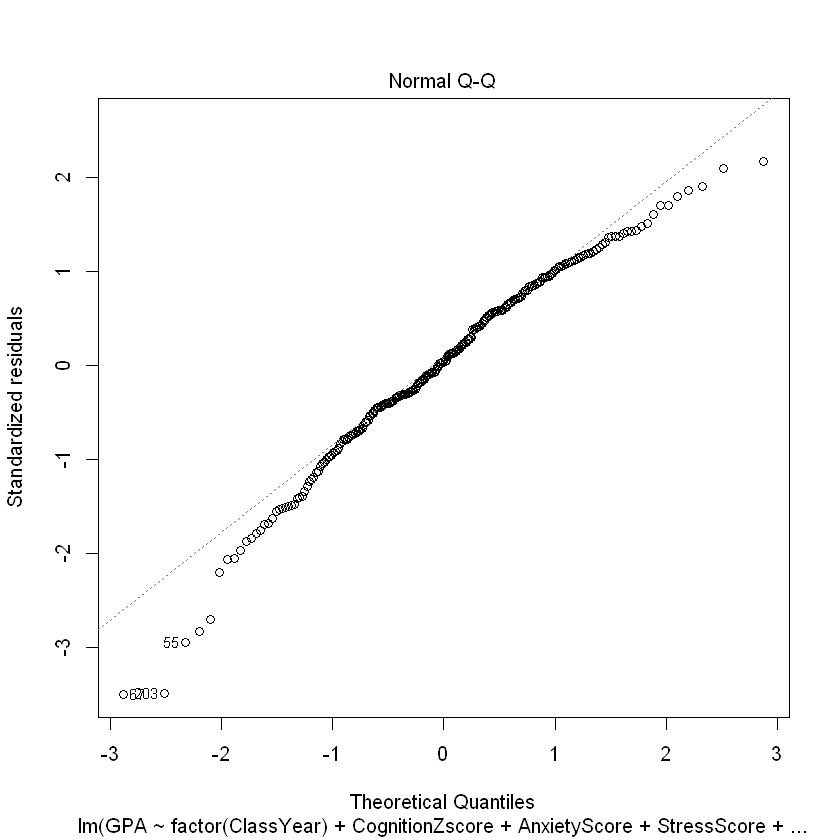

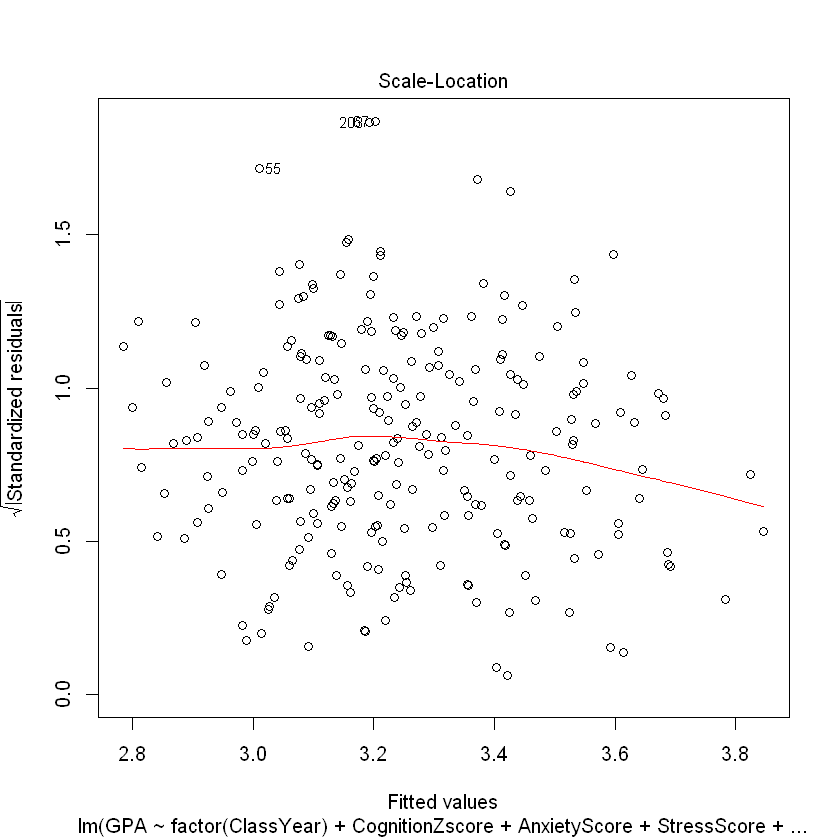

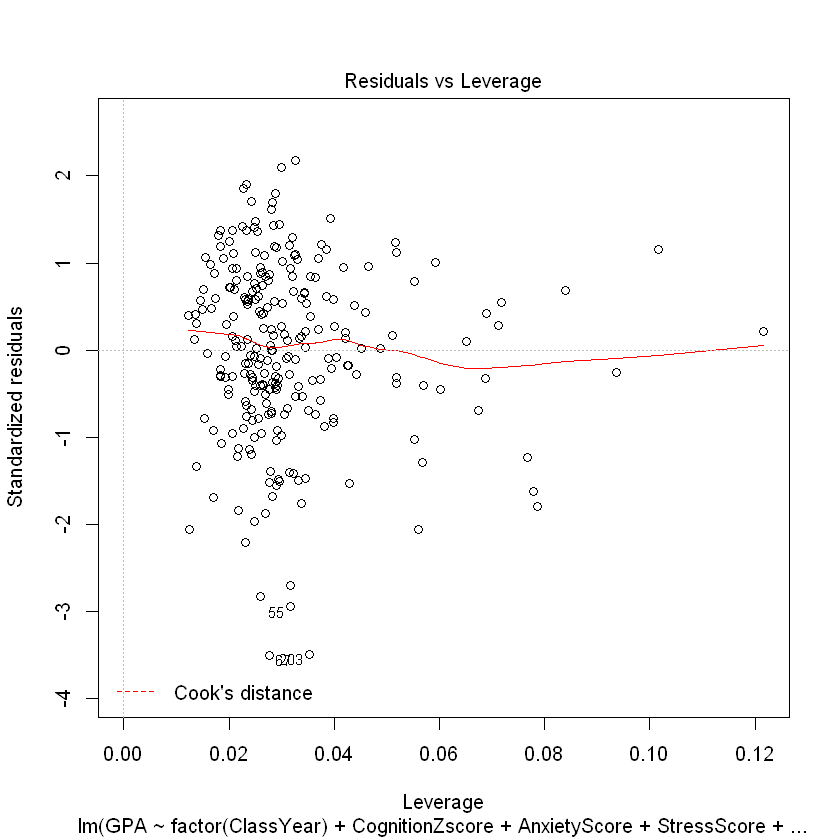

In [4]:
plot(mod6)

Comment briefly on the residual analysis.

It seems to be pretty heteroskedastic. I'ts not perfect, especially in the middle, but overall it's pretty close. It's also pretty close to a normal curve. Again it sort of falls off on the sides, but as a whole the fit is pretty close.

---

# Problem 2

The `NutritionStudy` data set within the `Lock5Data` package contains information on the health and nutrition of 315 individuals. The purpose in this problem is to use this data to model `Quetelet`, a variable defined as follows:

$$\text{Quetelet} = \frac{\text{Weight}}{\text{Height}^2}$$

The 19th century Statistician Adolphe Quetelet developed the idea that one's height should be used to determine an ideal weight. This is now recognized as the body mass index (BMI). First, consider the variable `PriorSmoke`, which takes one of three values:

Value | Meaning
----- | --------------
1     | Never smoked
2     | Used to smoke
3     | Still smoke

Since this is an ordered scale, this could be treated as a continuous variable, but could also be treated as a categorical variable (factor). Create a plot to show the fitted line for using the `PriorSmoke` variable to model `Quetelet` as both a continuous variable and a categorical variable. Don't forget to include a title, legend, axis labels, ad context information!

The following object is masked from SleepStudy:

    Gender



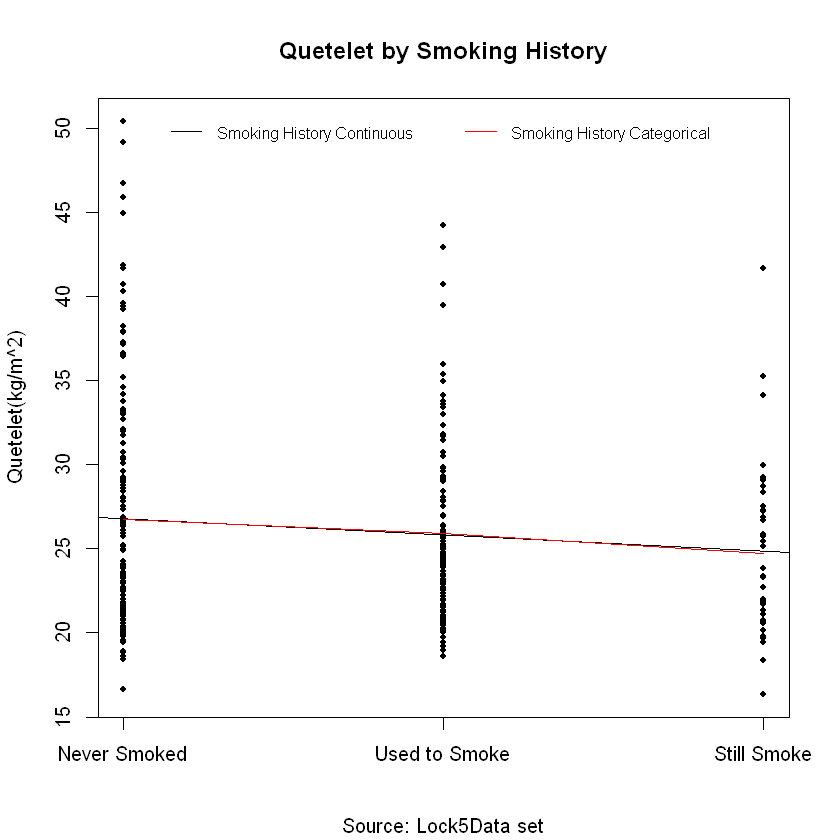

In [5]:
library(Lock5Data)
data("NutritionStudy")
attach(NutritionStudy)
plot(PriorSmoke, Quetelet, xlab = "", ylab = "", pch = 20, axes = F)
axis(1, at = c(1,2,3), labels = c("Never Smoked", "Used to Smoke", "Still Smoke"))
axis(2, at = seq(15,50, by = 5))
ContSmoke <- lm(Quetelet ~ PriorSmoke)
CatSmoke <- lm(Quetelet ~ factor(PriorSmoke))
box()
abline(ContSmoke)
q <- CatSmoke$coefficients[2:3] + CatSmoke$coefficients[1]
CatSmokePoints <- c(CatSmoke$coefficients[1], q)
lines(c(1,2,3), CatSmokePoints, col = "red")
title(main = "Quetelet by Smoking History", ylab = "Quetelet(kg/m^2)", sub = "Source: Lock5Data set")
legend(1.1,51, lty = c(1,1), col = c("black", "red"), c("Smoking History Continuous", "Smoking History Categorical"), cex = .8, horiz = T, bty = "n" )


Next, fit a model for `Quetelet` with the following predictors:

- `Cholesterol`
- `PriorSmoke` (either as a continuous or categorical variable, based on your answer above)
- `BetaPlasma`
- `Gender`
- An interaction between `Gender` and `PriorSmoke`

Name the linear model object `first_lm` and include a summary of the model output.

In [6]:
first_lm <- lm(Quetelet ~ Cholesterol + PriorSmoke + BetaPlasma + Gender + Gender*PriorSmoke)
summary(first_lm)


Call:
lm(formula = Quetelet ~ Cholesterol + PriorSmoke + BetaPlasma + 
    Gender + Gender * PriorSmoke)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.554  -4.210  -1.129   3.020  22.333 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           29.197461   1.149597  25.398  < 2e-16 ***
Cholesterol            0.004314   0.002596   1.662  0.09760 .  
PriorSmoke            -1.550624   0.498175  -3.113  0.00203 ** 
BetaPlasma            -0.007945   0.001816  -4.375 1.67e-05 ***
GenderMale            -3.951574   2.756809  -1.433  0.15276    
PriorSmoke:GenderMale  1.976515   1.419836   1.392  0.16490    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.785 on 309 degrees of freedom
Multiple R-squared:  0.08924,	Adjusted R-squared:  0.0745 
F-statistic: 6.055 on 5 and 309 DF,  p-value: 2.296e-05


Use backward selection to produce a model with predictors that are all significant at an $\alpha$-level of 0.05. Name the final model `final_lm` and include a summary of the model object.

In [7]:
first_lm <- lm(Quetelet ~ Cholesterol + PriorSmoke + BetaPlasma + Gender + Gender*PriorSmoke)
#summary(first_lm)
lm2 <- lm(Quetelet ~ Cholesterol + PriorSmoke + BetaPlasma + Gender)
#summary(lm2)
lm3 <- lm(Quetelet ~ Cholesterol + PriorSmoke + BetaPlasma)
#summary(lm3)
final_lm <- lm(Quetelet ~ PriorSmoke + BetaPlasma)
summary(final_lm)


Call:
lm(formula = Quetelet ~ PriorSmoke + BetaPlasma)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.582  -4.145  -1.059   3.068  22.308 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 29.745776   0.935509   31.80  < 2e-16 ***
PriorSmoke  -1.241703   0.465026   -2.67  0.00798 ** 
BetaPlasma  -0.008186   0.001807   -4.53 8.39e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.806 on 312 degrees of freedom
Multiple R-squared:  0.07378,	Adjusted R-squared:  0.06785 
F-statistic: 12.43 on 2 and 312 DF,  p-value: 6.413e-06


---

# Problem 3

Use the American Community Survey (`ACS`) dataset in the `Lock5Data` package to perform an analysis of variance (ANOVA) to compare mean incomes in `Race` and `Sex` groups. Should the model include an interaction term? Begin by making an interaction plot to determine if the effect of being a different race affects the sexes differently. Don't forget to include a title, axis labels, legend, and context information. Some of the preliminary data management has been done for you.

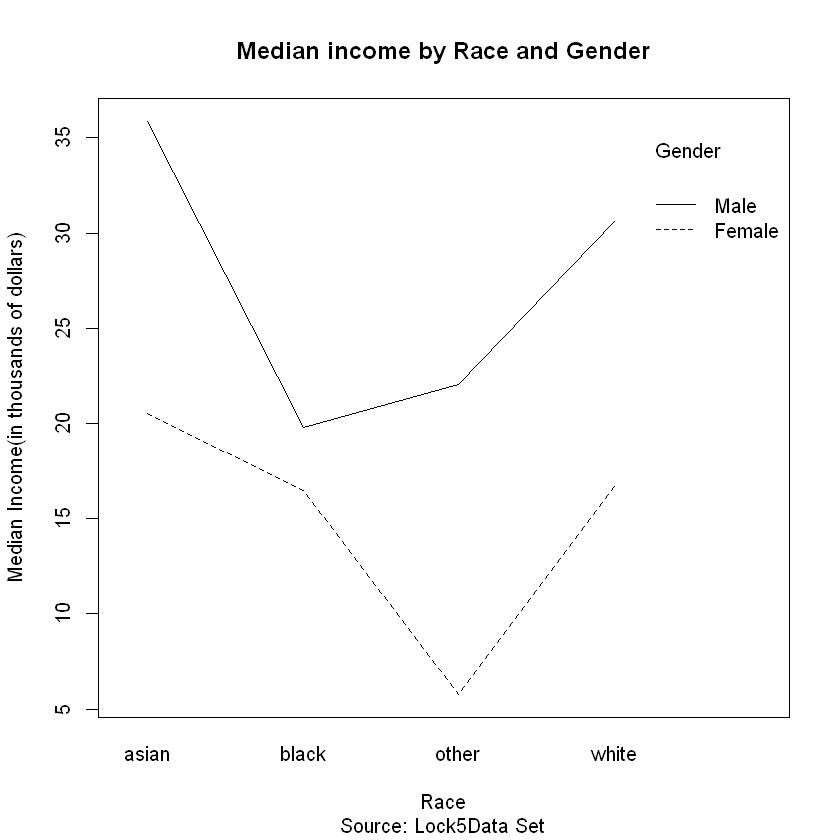

In [8]:
library(Lock5Data)
data("ACS")
ACS$Sex <- factor(ACS$Sex, labels = c("Female","Male"))
sub_acs <- subset(ACS, select = c("Income","Sex","Race"))
sub_acs <- na.omit(sub_acs)
interaction.plot(factor(sub_acs$Race),factor(sub_acs$Sex), sub_acs$Income, trace.label = "Gender", xlab = "Race", ylab = "Median Income(in thousands of dollars)")
title(main = "Median income by Race and Gender", sub = "Source: Lock5Data Set")


Next, perform an ANOVA for `Income` with the `Sex` and `Race` variables. Include the interaction between the two variables in the model as well. If necessary, use backward selection (don't add any more variables) to produce a final model. Name the final model `final_lm` and include a summary of the model object. Use an $\alpha$-level of 0.05 to determine whether variables are statistically significant.

In [9]:
modl1 <- lm(sub_acs$Income ~ sub_acs$Sex + sub_acs$Race + sub_acs$Race*sub_acs$Sex)
anova(modl1)
modl2 <- lm(sub_acs$Income ~ sub_acs$Sex + sub_acs$Race)
anova(modl2)
modl3 <- lm(sub_acs$Income ~ sub_acs$Sex)
anova(modl3)
final_lm <- modl3
anova(final_lm)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
sub_acs$Sex,1,37028.432,37028.4324,20.5653229,6.625760e-06
sub_acs$Race,3,6891.268,2297.0894,1.2757868,2.814808e-01
sub_acs$Sex:sub_acs$Race,3,1946.273,648.7577,0.3603153,7.816887e-01
Residuals,817,1471031.082,1800.5276,NA,NA


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
sub_acs$Sex,1,37028.432,37028.432,20.61357,6.461637e-06
sub_acs$Race,3,6891.268,2297.089,1.27878,2.804476e-01
Residuals,820,1472977.355,1796.314,NA,NA


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
sub_acs$Sex,1,37028.43,37028.432,20.59264,6.527636e-06
Residuals,823,1479868.62,1798.139,NA,NA


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
sub_acs$Sex,1,37028.43,37028.432,20.59264,6.527636e-06
Residuals,823,1479868.62,1798.139,NA,NA


Regardless of what your final model was above, conduct pairwise t-tests to see if any pairs of races have significantly different mean incomes. Use the Bonferroni correction on the p-values to adjust for multiple comparisons.

In [10]:
pairwise.t.test(sub_acs$Income, sub_acs$Race, p.adjust.method = "bonferroni")



	Pairwise comparisons using t tests with pooled SD 

data:  sub_acs$Income and sub_acs$Race 

      asian black other
black 0.71  -     -    
other 0.36  1.00  -    
white 1.00  1.00  0.95 

P value adjustment method: bonferroni 

Are any significantly different from each other? How does this match up with your ANOVA outcome? Answer breifly in only a sentence or two.

No, they are not signifigantly different from each other. This proves what the ANOVA analysis did. 